<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(_0_8)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-0.8'

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n30.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,74.641823,36.804403,80.014775,23.354670,0.184848,225.000520,224.781770,0.218750
1,0.0,1.0,34.962673,97.599828,33.789428,54.631517,-0.196308,230.787138,230.920228,-0.133090
2,0.0,2.0,92.436757,73.979481,37.091039,88.891346,0.254309,302.652932,302.429264,0.223669
3,0.0,3.0,73.799949,69.642227,55.763104,50.478906,0.076715,259.760902,259.666353,0.094550
4,0.0,4.0,55.019900,28.470154,96.544470,67.278740,0.172382,257.485646,257.335819,0.149827
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,37.739384,83.822691,98.768194,38.897651,-0.175914,269.052005,269.288811,-0.236805
29996,999.0,26.0,61.996132,57.536446,30.021642,23.854377,0.086842,183.495439,183.448547,0.046892
29997,999.0,27.0,53.336043,21.750228,45.502228,86.237107,-0.313921,216.511686,216.640686,-0.129000
29998,999.0,28.0,37.095423,84.615036,93.275055,76.646085,-0.246235,301.385364,301.589673,-0.204309


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    74.641823  36.804403  80.014775  23.354670  0.184848  225.000520   
      1.0    34.962673  97.599828  33.789428  54.631517 -0.196308  230.787138   
      2.0    92.436757  73.979481  37.091039  88.891346  0.254309  302.652932   
      3.0    73.799949  69.642227  55.763104  50.478906  0.076715  259.760902   
      4.0    55.019900  28.470154  96.544470  67.278740  0.172382  257.485646   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   37.739384  83.822691  98.768194  38.897651 -0.175914  269.052005   
      26.0   61.996132  57.536446  30.021642  23.854377  0.086842  183.495439   
      27.0   53.336043  21.750228  45.502228  86.237107 -0.313921  216.511686   
      28.0   37.095423  84.615036  93.275055  76.646085 -0.246235  301.385364   
      29.0   28.379938  42.438563  65.895948  68.135847  0.227478  215.077775   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    224.781770  0.218750  
      1.0    230.920228 -0.133090  
      2.0    302.429264  0.223669  
      3.0    259.666353  0.094550  
      4.0    257.335819  0.149827  
...                 ...       ...  
999.0 25.0   269.288811 -0.236805  
      26.0   183.448547  0.046892  
      27.0   216.640686 -0.129000  
      28.0   301.589673 -0.204309  
      29.0   214.742328  0.335446  

[30000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    74.641823  36.804403  80.014775  23.354670  0.184848  225.000520   
      1.0    34.962673  97.599828  33.789428  54.631517 -0.196308  230.787138   
      2.0    92.436757  73.979481  37.091039  88.891346  0.254309  302.652932   
      3.0    73.799949  69.642227  55.763104  50.478906  0.076715  259.760902   
      4.0    55.019900  28.470154  96.544470  67.278740  0.172382  257.485646   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   37.739384  83.822691  98.768194  38.897651 -0.175914  269.052005   
      26.0   61.996132  57.536446  30.021642  23.854377  0.086842  183.495439   
      27.0   53.336043  21.750228  45.502228  86.237107 -0.313921  216.511686   
      28.0   37.095423  84.615036  93.275055  76.646085 -0.246235  301.385364   
      29.0   28.379938  42.438563  65.895948  68.135847  0.227478  215.077775   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    224.781770  0.218750  
      1.0    230.920228 -0.133090  
      2.0    302.429264  0.223669  
      3.0    259.666353  0.094550  
      4.0    257.335819  0.149827  
...                 ...       ...  
999.0 25.0   269.288811 -0.236805  
      26.0   183.448547  0.046892  
      27.0   216.640686 -0.129000  
      28.0   301.589673 -0.204309  
      29.0   214.742328  0.335446  

[30000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,74.641823,36.804403,80.014775,23.354670,0.184848,225.000520,224.781770,0.218750
1,0.0,1.0,34.962673,97.599828,33.789428,54.631517,-0.196308,230.787138,230.920228,-0.133090
2,0.0,2.0,92.436757,73.979481,37.091039,88.891346,0.254309,302.652932,302.429264,0.223669
3,0.0,3.0,73.799949,69.642227,55.763104,50.478906,0.076715,259.760902,259.666353,0.094550
4,0.0,4.0,55.019900,28.470154,96.544470,67.278740,0.172382,257.485646,257.335819,0.149827
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,37.739384,83.822691,98.768194,38.897651,-0.175914,269.052005,269.288811,-0.236805
29996,999.0,26.0,61.996132,57.536446,30.021642,23.854377,0.086842,183.495439,183.448547,0.046892
29997,999.0,27.0,53.336043,21.750228,45.502228,86.237107,-0.313921,216.511686,216.640686,-0.129000
29998,999.0,28.0,37.095423,84.615036,93.275055,76.646085,-0.246235,301.385364,301.589673,-0.204309


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    74.641823  36.804403  80.014775  23.354670  0.184848  225.000520   
      1.0    34.962673  97.599828  33.789428  54.631517 -0.196308  230.787138   
      2.0    92.436757  73.979481  37.091039  88.891346  0.254309  302.652932   
      3.0    73.799949  69.642227  55.763104  50.478906  0.076715  259.760902   
      4.0    55.019900  28.470154  96.544470  67.278740  0.172382  257.485646   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   37.739384  83.822691  98.768194  38.897651 -0.175914  269.052005   
      26.0   61.996132  57.536446  30.021642  23.854377  0.086842  183.495439   
      27.0   53.336043  21.750228  45.502228  86.237107 -0.313921  216.511686   
      28.0   37.095423  84.615036  93.275055  76.646085 -0.246235  301.385364   
      29.0   28.379938  42.438563  65.895948  68.135847  0.227478  215.077775   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    224.781770  0.218750  
      1.0    230.920228 -0.133090  
      2.0    302.429264  0.223669  
      3.0    259.666353  0.094550  
      4.0    257.335819  0.149827  
...                 ...       ...  
999.0 25.0   269.288811 -0.236805  
      26.0   183.448547  0.046892  
      27.0   216.640686 -0.129000  
      28.0   301.589673 -0.204309  
      29.0   214.742328  0.335446  

[30000 rows x 8 columns]

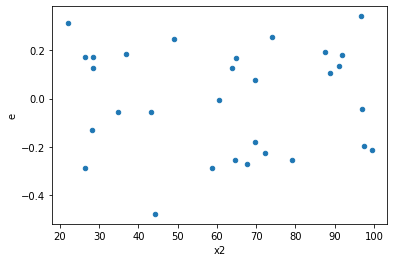

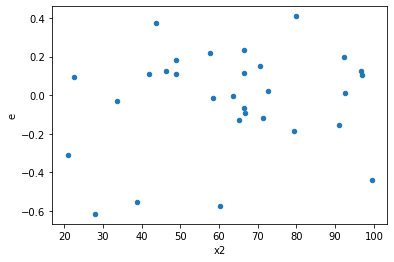

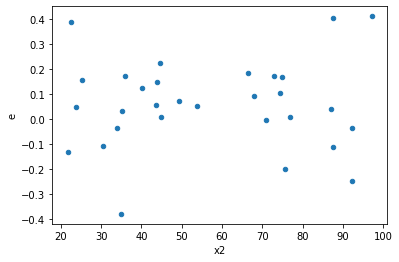

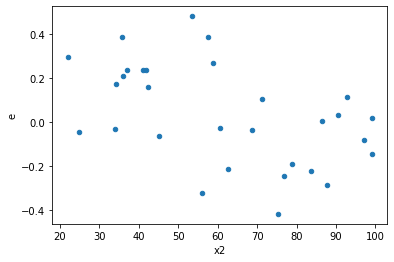

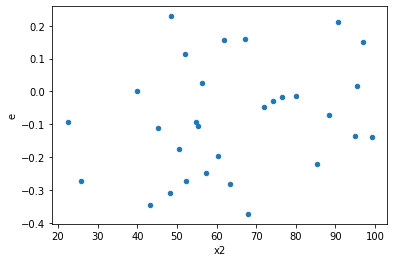

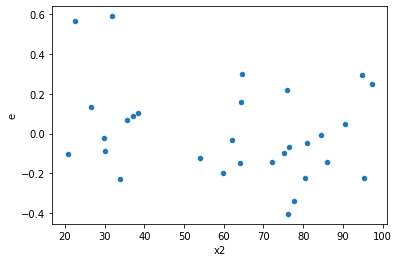

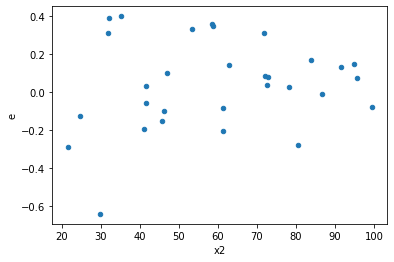

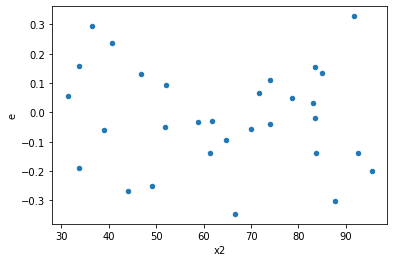

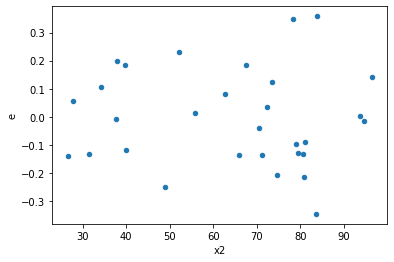

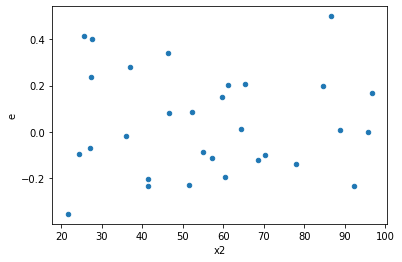

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,14.0,8.0,0.5062443907506088,0.321511715487664,0.03616031362504348,0.040188964435958,1.1114108371041451,0.9154878861394824,0.5422560569302588,0.4577439430697412,Reject001=1 : Homoscedasticity
1.0,13.0,9.0,0.38913059464129074,0.6788774511953464,0.02993312266471467,0.07543082791059404,2.5199785787639293,0.1693707743587951,0.9153146128206024,0.08468538717939755,Reject001=1 : Homoscedasticity
2.0,12.0,10.0,0.2872288261315059,0.37462062480675856,0.023935735510958827,0.03746206248067586,1.5651101451853897,0.4858633434077535,0.7570683282961232,0.24293167170387675,Reject001=1 : Homoscedasticity
3.0,10.0,12.0,0.3708454949981992,0.5829250241349316,0.037084549499819916,0.048577085344577636,1.309900915604045,0.6487744331075991,0.6756127834462005,0.32438721655379954,Reject001=1 : Homoscedasticity
5.0,7.0,15.0,0.11586591516707653,0.7974485884354402,0.016552273595296648,0.053163239229029345,3.21183908198181,0.054889657774468636,0.9725551711127657,0.027444828887234318,Reject001=1 : Homoscedasticity
9.0,7.0,15.0,0.3774590280352551,0.9161386351418352,0.05392271829075073,0.061075909009455684,1.1326563449590028,0.7881801937620554,0.6059099031189723,0.3940900968810277,Reject001=1 : Homoscedasticity
12.0,14.0,8.0,0.47573863578725784,0.5152855642183052,0.033981331127661274,0.06441069552728815,1.8954729961963424,0.3658137834097992,0.8170931082951004,0.1829068917048996,Reject001=1 : Homoscedasticity
13.0,11.0,11.0,0.09987142937726848,0.6803031890936337,0.009079220852478953,0.061845744463057614,6.811789851567661,0.0035463443176688703,0.9982268278411656,0.0017731721588344351,Reject001=0 : Heteroscedasticity
14.0,13.0,9.0,0.6574238063197064,0.47669951705057484,0.0505710620245928,0.052966613005619424,1.0473699955097178,0.9712599594491218,0.5143700202754391,0.4856299797245609,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,14.0,8.0,0.5062443907506088,0.321511715487664,0.03616031362504348,0.040188964435958,1.1114108371041451,0.9154878861394824,Reject001=1 : Homoscedasticity
1.0,13.0,9.0,0.38913059464129074,0.6788774511953464,0.02993312266471467,0.07543082791059404,2.5199785787639293,0.1693707743587951,Reject001=1 : Homoscedasticity
2.0,12.0,10.0,0.2872288261315059,0.37462062480675856,0.023935735510958827,0.03746206248067586,1.5651101451853897,0.4858633434077535,Reject001=1 : Homoscedasticity
3.0,10.0,12.0,0.3708454949981992,0.5829250241349316,0.037084549499819916,0.048577085344577636,1.309900915604045,0.6487744331075991,Reject001=1 : Homoscedasticity
4.0,12.0,10.0,0.35506794398026403,0.28373655478036525,0.02958899533168867,0.028373655478036525,0.9589259506776642,0.9312155762395606,Reject001=1 : Homoscedasticity
5.0,7.0,15.0,0.11586591516707653,0.7974485884354402,0.016552273595296648,0.053163239229029345,3.21183908198181,0.054889657774468636,Reject001=1 : Homoscedasticity
6.0,9.0,13.0,0.4142771958894151,0.42638893712072395,0.046030799543268344,0.03279914900928646,0.712547888255899,0.6199956710739514,Reject001=1 : Homoscedasticity
7.0,16.0,6.0,0.4036453182656902,0.1083464951453234,0.02522783239160564,0.01805774919088723,0.7157867909767707,0.55049192405101,Reject001=1 : Homoscedasticity
8.0,9.0,13.0,0.3228730454843576,0.3753831337244253,0.03587478283159529,0.028875625671109635,0.8049003615341352,0.7598366852628052,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      963
Reject001=0 : Heteroscedasticity     37
Name: Result_test, dtype: int64